# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


In [406]:
#Headers
import pandas as pd
import numpy as np
%matplotlib inline

We include the headers necessary for our operations

In [407]:
dataframe = pd.read_csv('Dataset.csv')

We import our dataset into a pandas dataframe as shown above

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

Assuming it follows a ***uniform distribution***, We can say the probability of occurance of digits 1-9 to be same, which is 11.11%

1. 11% of values will be having first digit as 1 and 11% of values will be having the first digit as 9
2. 10% of values will be having first digit as 1 and 10% of values will be having the first digit as 9

We switched to 10 percent because 0 can occur as the last digit.

But let's check it out...

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [408]:
#Checking the dataset
dataframe.head()

,date,Name,open,close,volume
0,2018-02-01,AAL,$54.00,$53.88,3623078
1,2018-02-01,AAPL,$167.16,$167.78,47230787
2,2018-02-01,AAP,$116.24,$117.29,760629
3,2018-02-01,ABBV,$112.24,$116.34,9943452
4,2018-02-01,ABC,$97.74,$99.29,2786798


In [409]:
#Checking the types
dataframe.dtypes

date      object
Name      object
open      object
close     object
volume     int64
dtype: object

In [410]:
#Checking the dataset
dataframe['volume'] = dataframe['volume'].astype(str)
dataframe.describe()

,date,Name,open,close,volume
count,505,505,505,505,505
unique,1,505,495,498,505
top,2018-02-01,PM,$45.50,$193.47,4079061
freq,505,1,2,2,1


We are having two options to chose as the index. They are Name and Volume, because they are having all unique values and using them to represent an instance will not cause any problems. I am going with Name because it makes the dataset more readable.

In [411]:
#Setting the index
dataframe.set_index("Name", inplace = True)
dataframe.head()

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798


We have processed the dataframe to have the Name as index, so it is sorted around it

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

In [412]:
#Preparing our target column
target = 'volume'
dataframe.sort_values(target, inplace = True)
dataframe.head()

,date,open,close,volume
Name,,,,
CXO,2018-02-01,$158.03,$159.26,1003247
FLR,2018-02-01,$60.43,$60.44,1004841
KSU,2018-02-01,$112.80,$112.87,1011156
HUM,2018-02-01,$281.79,$279.77,1013468
BWA,2018-02-01,$55.73,$56.39,1014613


In [413]:
#Making a copy of dataset
first_vol_df = dataframe.copy(deep = True)
first_vol_df.head()

,date,open,close,volume
Name,,,,
CXO,2018-02-01,$158.03,$159.26,1003247
FLR,2018-02-01,$60.43,$60.44,1004841
KSU,2018-02-01,$112.80,$112.87,1011156
HUM,2018-02-01,$281.79,$279.77,1013468
BWA,2018-02-01,$55.73,$56.39,1014613


In [414]:
#Getting the first digit of volume
first_vol_df[target] = first_vol_df[target].str[0]
first_vol_df.head()

,date,open,close,volume
Name,,,,
CXO,2018-02-01,$158.03,$159.26,1
FLR,2018-02-01,$60.43,$60.44,1
KSU,2018-02-01,$112.80,$112.87,1
HUM,2018-02-01,$281.79,$279.77,1
BWA,2018-02-01,$55.73,$56.39,1


In [415]:
#Finding the distribution of digit
first_vol_df[target] = first_vol_df[target].astype(int)
first_vol_df[target].value_counts()

1    165
2     93
3     59
4     43
5     41
6     36
7     25
8     22
9     21
Name: volume, dtype: int64

Text(0, 0.5, 'Frequency')

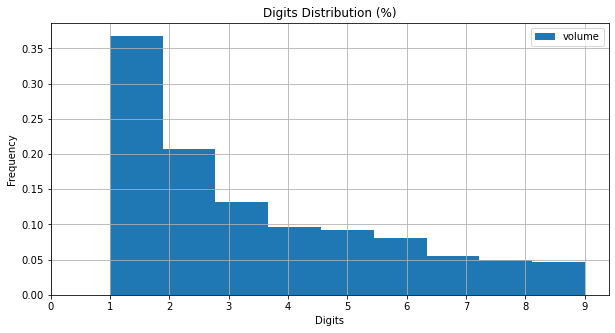

In [416]:
#Plotting the information
ax = first_vol_df[target].plot(kind = 'hist',
                           bins = 9, 
                           grid = True,
                           density = True,
                           legend = True,
                           figsize = (10, 5),
                           title = 'Digits Distribution (%)')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9])
ax.set_xlabel('Digits')
ax.set_ylabel('Frequency')

From the above graph we can observe that, The assumption is wrong. We have around 35% of volume values that starts with a 1

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

In [417]:
#Making a copy of dataset
last_vol_df = dataframe.copy(deep = True)
last_vol_df.head()

,date,open,close,volume
Name,,,,
CXO,2018-02-01,$158.03,$159.26,1003247
FLR,2018-02-01,$60.43,$60.44,1004841
KSU,2018-02-01,$112.80,$112.87,1011156
HUM,2018-02-01,$281.79,$279.77,1013468
BWA,2018-02-01,$55.73,$56.39,1014613


In [418]:
#Getting the last digit of volume
last_vol_df[target] = last_vol_df[target].str[-1]
last_vol_df.head()

,date,open,close,volume
Name,,,,
CXO,2018-02-01,$158.03,$159.26,7
FLR,2018-02-01,$60.43,$60.44,1
KSU,2018-02-01,$112.80,$112.87,6
HUM,2018-02-01,$281.79,$279.77,8
BWA,2018-02-01,$55.73,$56.39,3


In [419]:
#Finding the distribution of digit
last_vol_df[target] = last_vol_df[target].astype(int)
last_vol_df[target].value_counts()

2    56
8    56
1    53
9    53
0    52
7    52
6    51
3    48
5    44
4    40
Name: volume, dtype: int64

Text(0, 0.5, 'Frequency')

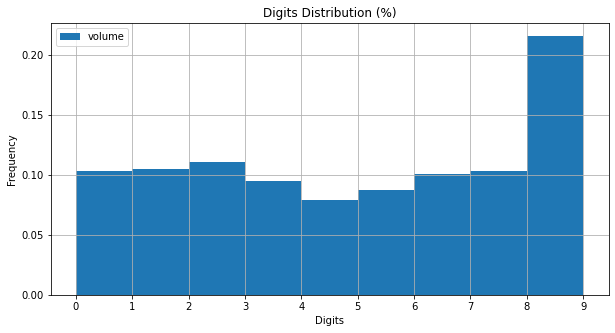

In [420]:
#Plotting the information
ax = last_vol_df[target].plot(kind = 'hist',
                           bins = 9, 
                           grid = True,
                           density = True,
                           legend = True,
                           figsize = (10, 5),
                           title = 'Digits Distribution (%)')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9])
ax.set_xlabel('Digits')
ax.set_ylabel('Frequency')

From the above graph we can observe that, The assumption is kinda correct. We have around 11% of volume values that ends with a 1. However, it does not follow a uniform distribution because the occurance of digit 9 is more than the rest.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [421]:
#Making a copy of dataset
first_close_df = dataframe.copy(deep = True)
first_close_df.head()

,date,open,close,volume
Name,,,,
CXO,2018-02-01,$158.03,$159.26,1003247
FLR,2018-02-01,$60.43,$60.44,1004841
KSU,2018-02-01,$112.80,$112.87,1011156
HUM,2018-02-01,$281.79,$279.77,1013468
BWA,2018-02-01,$55.73,$56.39,1014613


In [422]:
#Preparing our target column
target = 'close'
first_close_df.sort_values(target, inplace = True)
first_close_df.head()

,date,open,close,volume
Name,,,,
GOOG,2018-02-01,"$1,162.61","$1,167.70",2412114
GOOGL,2018-02-01,"$1,175.99","$1,181.59",3675709
AMZN,2018-02-01,"$1,445.00","$1,390.00",9113808
PCLN,2018-02-01,"$1,903.99","$1,903.69",360015
F,2018-02-01,$10.95,$10.92,41352192


In [423]:
#Getting the first digit of close
first_close_df[target] = first_close_df[target].str[1]
first_close_df.head()

,date,open,close,volume
Name,,,,
GOOG,2018-02-01,"$1,162.61",1,2412114
GOOGL,2018-02-01,"$1,175.99",1,3675709
AMZN,2018-02-01,"$1,445.00",1,9113808
PCLN,2018-02-01,"$1,903.99",1,360015
F,2018-02-01,$10.95,1,41352192


In [424]:
#Finding the distribution of digit
first_close_df[target] = first_close_df[target].astype(int)
first_close_df[target].value_counts()

1    171
2     55
3     52
6     48
4     43
7     43
5     39
8     28
9     26
Name: close, dtype: int64

Text(0, 0.5, 'Frequency')

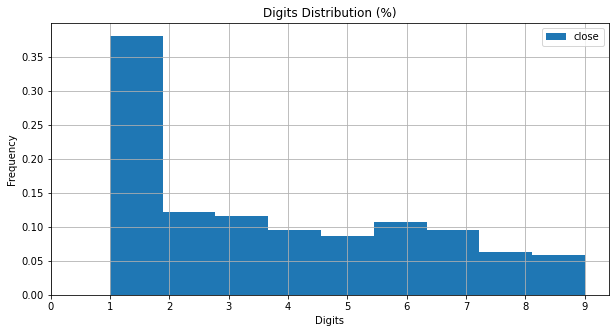

In [425]:
#Plotting the information
ax = first_close_df[target].plot(kind = 'hist',
                                 bins = 9, 
                                 grid = True,
                                 density = True,
                                 legend = True,
                                 figsize = (10, 5),
                                 title = 'Digits Distribution (%)')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9])
ax.set_xlabel('Digits')
ax.set_ylabel('Frequency')

We can see that close feature also follows the same distribution as the volume. But this is ***not a casual thing***. I don't think they are depandant on each other. 

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Upload your .ipyn Notebook to Canvas. 
4. Have the TA check your lab to obtain credit. 